<a href="https://colab.research.google.com/github/Cesarabs/Cousersera-WebDeveloper/blob/main/Modelos_predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aula 1



In [54]:
import pandas as pd
import numpy as np
from scipy import special

import itertools
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
fraude_df = pd.read_csv('Fraud_Data.csv')

In [70]:
ip_df = pd.read_csv('IpAddress_to_Country.csv')

In [71]:
fraude_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [72]:
ip_df.head()

,limite_inferior_ip,limite_superior_ip,pais
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [73]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              151112 non-null  int64  
 1   hora_registro   151112 non-null  object 
 2   hora_compra     151112 non-null  object 
 3   valor_compra    151112 non-null  int64  
 4   id_dispositivo  151112 non-null  object 
 5   fuente          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   genero          151112 non-null  object 
 8   edad            151112 non-null  int64  
 9   ip              151112 non-null  float64
 10  fraude          151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [74]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   limite_inferior_ip  138846 non-null  float64
 1   limite_superior_ip  138846 non-null  int64  
 2   pais                138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [75]:
ip_floats =  ip_df.limite_inferior_ip.apply(lambda x: not x.is_integer()).sum()

In [76]:
print ("Casos de Ips con numero decimal diferente de cero:", ip_floats)

Casos de Ips con numero decimal diferente de cero: 0


In [77]:
ip_df.limite_inferior_ip = ip_df.limite_inferior_ip.astype(int)

In [78]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   limite_inferior_ip  138846 non-null  int64 
 1   limite_superior_ip  138846 non-null  int64 
 2   pais                138846 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


In [79]:
fraude_df.hora_registro = pd.to_datetime(fraude_df.hora_registro)

In [80]:
fraude_df.hora_compra = pd.to_datetime(fraude_df.hora_compra)

In [81]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   hora_registro   151112 non-null  datetime64[ns]
 2   hora_compra     151112 non-null  datetime64[ns]
 3   valor_compra    151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fuente          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   edad            151112 non-null  int64         
 9   ip              151112 non-null  float64       
 10  fraude          151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [82]:
fraude_df.describe()

,id,valor_compra,edad,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [83]:
fraude_df.ip = fraude_df.ip.astype(int)

In [84]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   hora_registro   151112 non-null  datetime64[ns]
 2   hora_compra     151112 non-null  datetime64[ns]
 3   valor_compra    151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fuente          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   edad            151112 non-null  int64         
 9   ip              151112 non-null  int64         
 10  fraude          151112 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.7+ MB


In [85]:
def ip_por_pais(ip):
    try:
        return ip_df.pais[(ip_df.limite_inferior_ip < ip) & (ip_df.limite_superior_ip>ip)].iloc[0]
    except:
        return "Desconocido"


In [86]:
fraude_df['ip_pais'] = fraude_df.ip.apply(ip_por_pais)

In [87]:
fraude_df.head(20)

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2809315199,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3987484328,0,Desconocido
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1692458727,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3719094257,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,341674739,0,United States


In [88]:
fraude_df.to_csv('Datos_fraude_con_pais.csv', index=False)

In [89]:
base_df = pd.read_csv('Datos_fraude_con_pais.csv')

In [90]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


##Aula 2 - Analisis exploratorio

In [91]:
print("porcentaje de fraude: ", int(base_df['fraude'].mean() * 1000)/10, "%")

porcentaje de fraude:  9.3 %


In [92]:
base_df.groupby(by = 'browser').mean()['fraude']

<ipython-input-92-88bbfc78e36e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_df.groupby(by = 'browser').mean()['fraude']


browser
Chrome     0.098792
FireFox    0.095165
IE         0.086775
Opera      0.089227
Safari     0.090201
Name: fraude, dtype: float64

<ipython-input-93-48b217d80c44>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x = base_df.groupby(by = 'browser').mean()['fraude'].index,
<ipython-input-93-48b217d80c44>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = base_df.groupby(by = 'browser').mean()['fraude'],


<Axes: xlabel='browser', ylabel='fraude'>

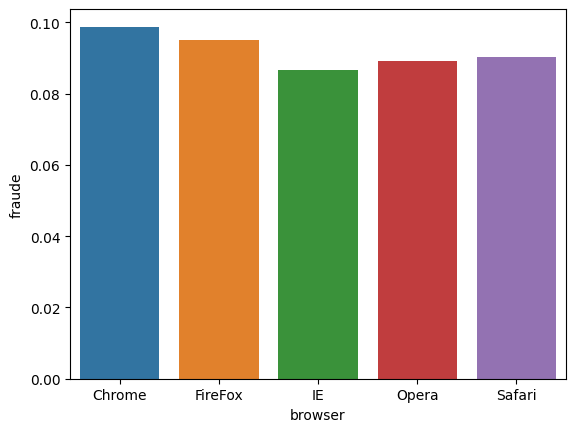

In [93]:
sns.barplot(x = base_df.groupby(by = 'browser').mean()['fraude'].index,
            y = base_df.groupby(by = 'browser').mean()['fraude'],
            data = base_df)

<ipython-input-94-67e77a02a569>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x = base_df.groupby(by = 'genero').mean()['fraude'].index,
<ipython-input-94-67e77a02a569>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = base_df.groupby(by = 'genero').mean()['fraude'],


<Axes: xlabel='genero', ylabel='fraude'>

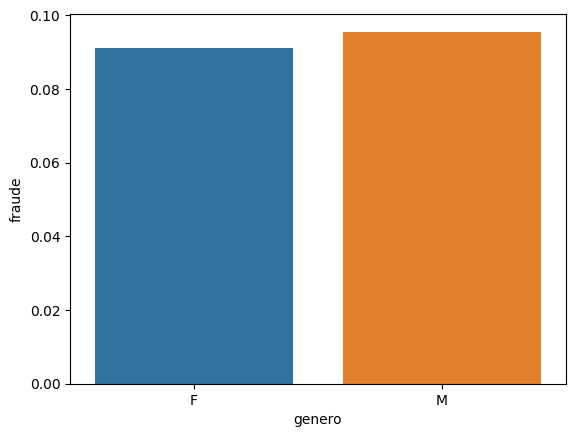

In [94]:
  sns.barplot(x = base_df.groupby(by = 'genero').mean()['fraude'].index,
              y = base_df.groupby(by = 'genero').mean()['fraude'],
              data = base_df)

<ipython-input-95-cd99b86e6821>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x = base_df.groupby(by = 'fuente').mean()['fraude'].index,
<ipython-input-95-cd99b86e6821>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = base_df.groupby(by = 'fuente').mean()['fraude'],


<Axes: xlabel='fuente', ylabel='fraude'>

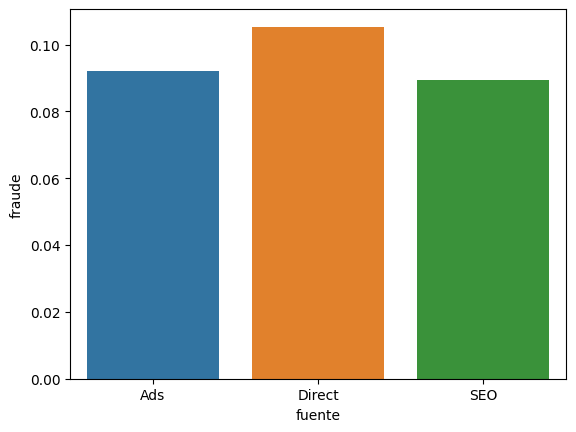

In [95]:
sns.barplot(x = base_df.groupby(by = 'fuente').mean()['fraude'].index,
            y = base_df.groupby(by = 'fuente').mean()['fraude'],
            data = base_df)

<Axes: xlabel='fraude', ylabel='edad'>

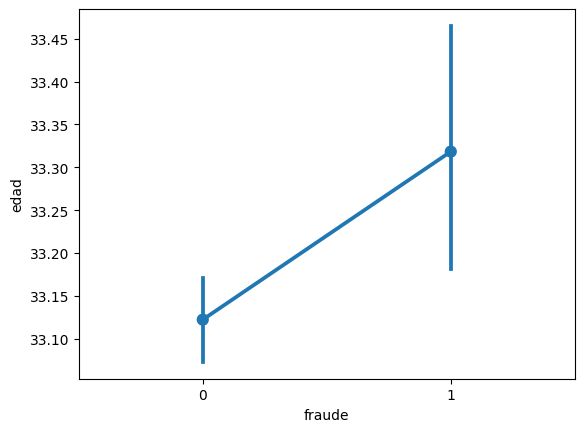

In [96]:
sns.pointplot(x = 'fraude', y = 'edad', data = base_df)

<Axes: xlabel='fraude', ylabel='valor_compra'>

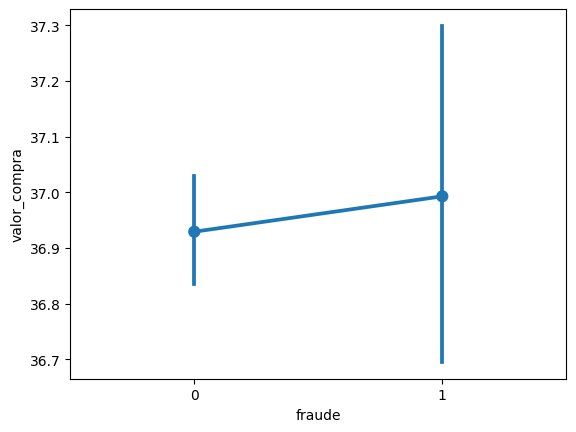

In [97]:
sns.pointplot(x = 'fraude', y = 'valor_compra', data = base_df)

##Analisis por Id Dispositivo e IP

In [98]:
freq_df = pd.DataFrame(columns=('fraude', 'id_por_dispositivo', 'id_por_ip'))

In [99]:
freq_df['fraude'] = base_df['fraude']

In [100]:
contar_id_por_dispotivo = base_df.groupby(by='id_dispositivo').id.count()

In [101]:
freq_df['id_por_dispositivo'] = base_df.id_dispositivo.apply(lambda x: contar_id_por_dispotivo[x])

In [102]:
contar_id_por_ip = base_df.groupby(by='ip').id.count()

In [103]:
freq_df.head(10)

,fraude,id_por_dispositivo,id_por_ip
0,0,1,NaN
1,0,1,NaN
2,1,12,NaN
3,0,1,NaN
4,0,1,NaN
5,0,1,NaN
6,0,1,NaN
7,0,1,NaN
8,0,1,NaN
9,0,1,NaN


In [104]:
freq_df['id_por_ip'] = base_df.ip.apply(lambda x: contar_id_por_ip[x])

In [105]:
freq_df.head(10)

,fraude,id_por_dispositivo,id_por_ip
0,0,1,1
1,0,1,1
2,1,12,12
3,0,1,1
4,0,1,1
5,0,1,1
6,0,1,1
7,0,1,1
8,0,1,1
9,0,1,1


<Axes: xlabel='fraude', ylabel='id_por_dispositivo'>

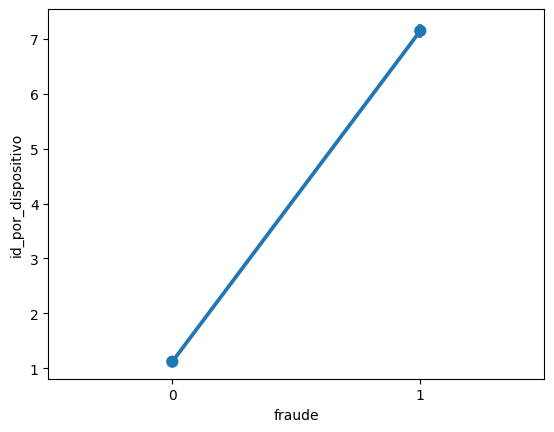

In [106]:
sns.pointplot(x='fraude', y='id_por_dispositivo', data=freq_df)

<Axes: xlabel='fraude', ylabel='id_por_ip'>

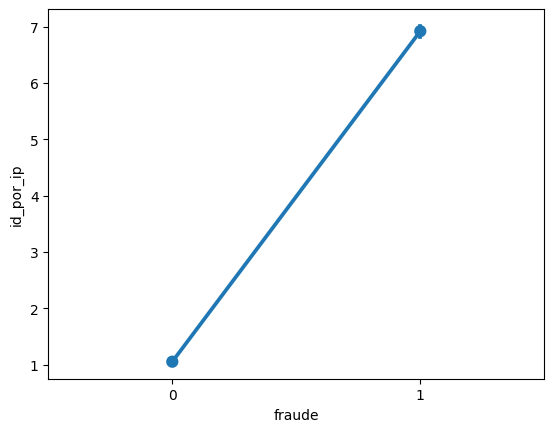

In [107]:
sns.pointplot(x='fraude', y='id_por_ip', data=freq_df)

##Analisis por pais

In [108]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


<Axes: >

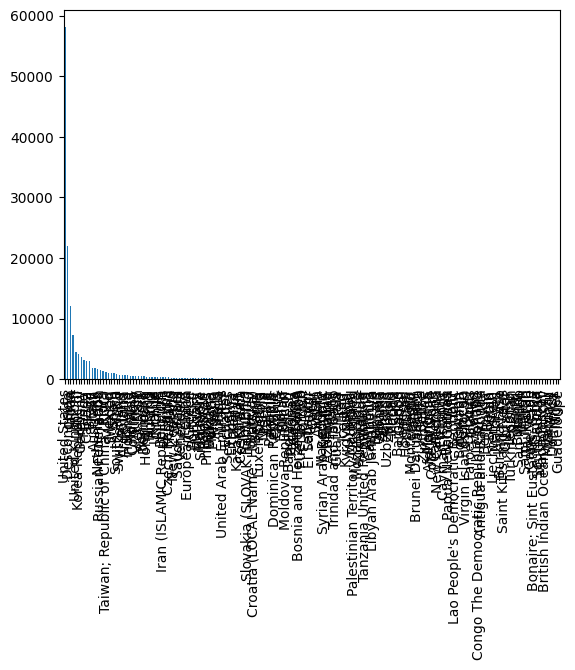

In [109]:
base_df.ip_pais.value_counts().plot(kind='bar')

<Axes: >

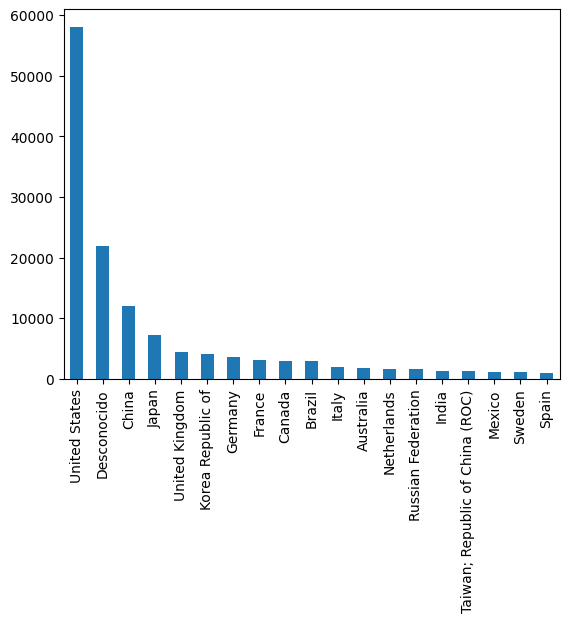

In [110]:
base_df.ip_pais.value_counts()[base_df.ip_pais.value_counts()>1000].plot(kind='bar')

<ipython-input-111-0aeb5f51830c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_df.groupby(by='ip_pais').mean()['fraude'][base_df.ip_pais.value_counts()>1000].plot(kind='bar')


<Axes: xlabel='ip_pais'>

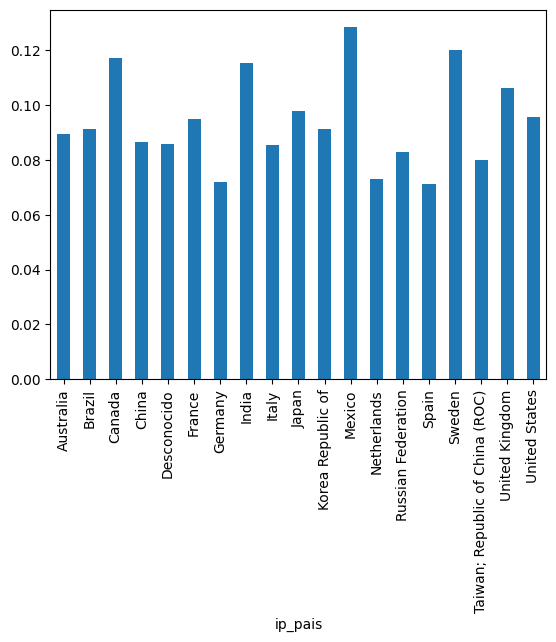

In [111]:
base_df.groupby(by='ip_pais').mean()['fraude'][base_df.ip_pais.value_counts()>1000].plot(kind='bar')

##Analisis tiempo (hora registro, hora compra)

In [112]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              151112 non-null  int64 
 1   hora_registro   151112 non-null  object
 2   hora_compra     151112 non-null  object
 3   valor_compra    151112 non-null  int64 
 4   id_dispositivo  151112 non-null  object
 5   fuente          151112 non-null  object
 6   browser         151112 non-null  object
 7   genero          151112 non-null  object
 8   edad            151112 non-null  int64 
 9   ip              151112 non-null  int64 
 10  fraude          151112 non-null  int64 
 11  ip_pais         151112 non-null  object
dtypes: int64(5), object(7)
memory usage: 13.8+ MB


In [113]:
base_df.hora_registro = pd.to_datetime(base_df.hora_registro)

In [114]:
base_df.hora_compra = pd.to_datetime(base_df.hora_compra)

In [115]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   hora_registro   151112 non-null  datetime64[ns]
 2   hora_compra     151112 non-null  datetime64[ns]
 3   valor_compra    151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fuente          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   edad            151112 non-null  int64         
 9   ip              151112 non-null  int64         
 10  fraude          151112 non-null  int64         
 11  ip_pais         151112 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 13.8+ MB


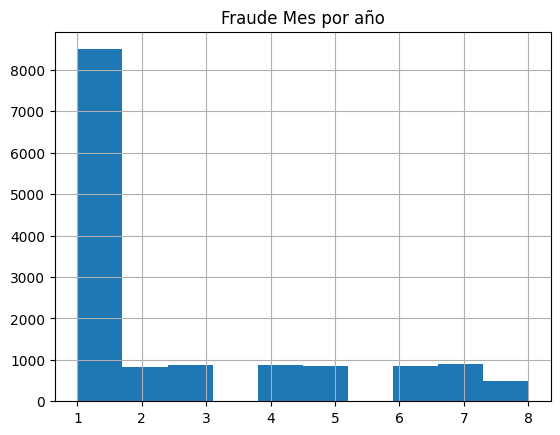

In [116]:
base_df[base_df['fraude']==1].hora_registro.apply(lambda x: x.month).hist()
plt.title('Fraude Mes por año');

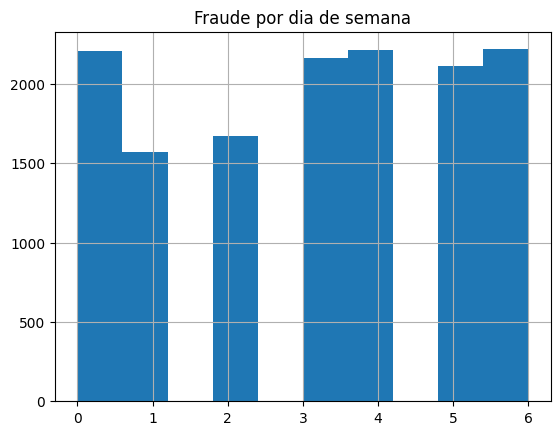

In [117]:
base_df[base_df['fraude']==1].hora_registro.apply(lambda x: x.dayofweek).hist()
plt.title('Fraude por dia de semana');

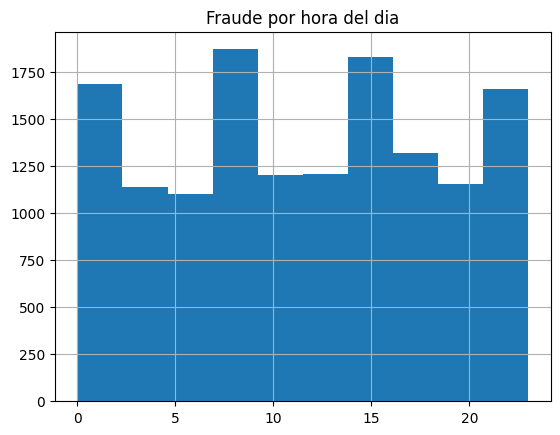

In [118]:
base_df[base_df['fraude']==1].hora_registro.apply(lambda x: x.hour).hist()
plt.title('Fraude por hora del dia');

In [119]:
freq_df['hora_registro'] = base_df['hora_registro']

In [120]:
freq_df['hora_compra'] = base_df['hora_compra']

In [121]:
freq_df['tiempo_seg'] = (freq_df['hora_compra'] - freq_df['hora_registro']).apply(lambda x: x.seconds)

<Axes: xlabel='fraude', ylabel='tiempo_seg'>

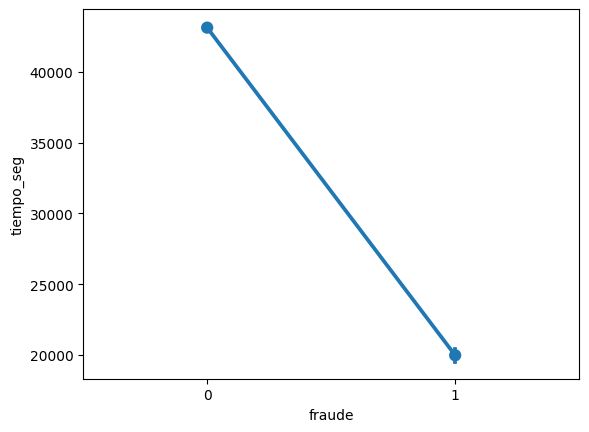

In [122]:
sns.pointplot(x='fraude', y= 'tiempo_seg', data=freq_df)

## Aula 3- Ingenieria de recursos

In [123]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


In [124]:
# Información de ID Dispositivo
contar_id_dispositivo = base_df.groupby(by='id_dispositivo').id.count()
base_df['id_por_dispositivo'] = base_df.id_dispositivo.apply(lambda x: contar_id_dispositivo[x])
# Información de IP
contar_id_ip = base_df.groupby(by = 'ip').id.count()
base_df['id_por_ip'] = base_df.ip.apply(lambda x: contar_id_ip[x])

In [125]:
base_df['ids'] = (base_df['id_por_dispositivo'] + base_df['id_por_ip']) / 2

In [126]:
base_df['hora'] = base_df.hora_registro.apply(lambda x: x.hour)
base_df['dia'] = base_df.hora_registro.apply(lambda x: x.dayofweek)
base_df['tiempo_seg'] = (base_df['hora_compra'] - base_df['hora_registro']).apply(lambda x: x.seconds)

In [127]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1,1.0,22,1,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,1,1.0,20,6,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido,1,1,1.0,21,1,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,1,1.0,7,1,41461


In [128]:
base_df['compra_rapida'] = base_df['tiempo_seg'].apply(lambda x: 1 if x < 30 else 0)

In [129]:
contar_paises = base_df.groupby(by=['id_dispositivo', 'ip_pais']).count().reset_index()

In [130]:
contar_paises = pd.DataFrame(contar_paises.groupby(by = 'id_dispositivo').count().ip_pais)

In [131]:
contar_paises[contar_paises['ip_pais']> 1]

,ip_pais
id_dispositivo,
AAFBODGQYEMVK,2
AAIGAICKBXPSW,2
AAXWKVBISBGWI,2
ABAWKCLFOLYDQ,2
ABGAAIZLGEAPV,2
...,...
ZZJGHWLIVVIIS,2
ZZJTXSOBVKLIT,2
ZZKXASRAZPHYR,2


In [132]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg,compra_rapida
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1,1.0,22,1,13882,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,1,1.0,20,6,17944,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido,1,1,1.0,21,1,60085,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,1,1.0,7,1,41461,0


In [133]:
base_df = base_df.merge(contar_paises, left_on='id_dispositivo', right_index = True)

In [134]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais_x,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg,compra_rapida,ip_pais_y
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1,1.0,22,1,13882,0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,1,1.0,20,6,17944,0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1,1,1
2626,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1,1,1
22106,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1,1,1


In [135]:
base_df.rename(columns={'ip_pais_x': 'ip_pais', 'ip_pais_y': 'qt_paises'}, inplace=True)

In [136]:
riesgo_pais = pd.DataFrame(base_df.groupby(by='ip_pais').mean()['fraude'].sort_values(ascending=False))

<ipython-input-136-bd929e74dda3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  riesgo_pais = pd.DataFrame(base_df.groupby(by='ip_pais').mean()['fraude'].sort_values(ascending=False))


In [137]:
riesgo_pais.head(20)

,fraude
ip_pais,
Turkmenistan,1.000000
Namibia,0.434783
Sri Lanka,0.419355
Luxembourg,0.388889
Virgin Islands (U.S.),0.333333
Ecuador,0.264151
Tunisia,0.262712
Peru,0.260504
Bolivia,0.245283


In [138]:
base_df = base_df.merge(riesgo_pais, left_on='ip_pais', right_index = True)

In [139]:
base_df.rename(columns={'fraude_x': 'fraude', 'fraude_y': 'riesgo_pais'}, inplace=True)

In [140]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,...,ip_pais,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg,compra_rapida,qt_paises,riesgo_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,...,Japan,1,1,1.0,22,1,13882,0,1,0.097865
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2521870760,...,Japan,1,1,1.0,18,4,84502,0,1,0.097865
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3682311659,...,Japan,1,1,1.0,12,6,57849,0,1,0.097865
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3665104626,...,Japan,2,1,1.5,13,6,82537,0,2,0.097865
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,735996079,...,Japan,2,1,1.5,11,0,75852,0,2,0.097865


In [141]:
base_df['registro_enero'] =  base_df.hora_registro.apply(lambda x: 1 if x.month == 1 else 0)

In [142]:
base_df['riesgo_pais_group'] = base_df.riesgo_pais.apply(lambda x: 'Riesgo Altisimo' if x > 0.25 else
                                                         'Riesto Alto 'if x > 0.1 else
                                                         'Riesgo Medio' if x > 0.03 else
                                                         'Riesgo Bajo')

In [143]:
base_df.head(10)

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,...,id_por_ip,ids,hora,dia,tiempo_seg,compra_rapida,qt_paises,riesgo_pais,registro_enero,riesgo_pais_group
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,...,1,1.0,22,1,13882,0,1,0.097865,0,Riesgo Medio
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2521870760,...,1,1.0,18,4,84502,0,1,0.097865,0,Riesgo Medio
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3682311659,...,1,1.0,12,6,57849,0,1,0.097865,0,Riesgo Medio
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3665104626,...,1,1.5,13,6,82537,0,2,0.097865,1,Riesgo Medio
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,735996079,...,1,1.5,11,0,75852,0,2,0.097865,0,Riesgo Medio
106,28074,2015-07-03 09:31:29,2015-08-07 20:12:17,22,GQOICTLWVUQJR,Ads,Chrome,M,36,728934460,...,1,1.0,9,4,38448,0,1,0.097865,0,Riesgo Medio
108,135536,2015-05-03 22:40:07,2015-07-18 15:43:38,32,ITRXCOXKEQTAM,SEO,FireFox,M,37,2097967789,...,1,1.5,22,6,61411,0,2,0.097865,0,Riesgo Medio
115,208666,2015-02-23 06:07:21,2015-04-17 11:11:17,51,ATZZLTQJZHTCS,Direct,Safari,M,32,1877903689,...,1,1.0,6,0,18236,0,1,0.097865,0,Riesgo Medio
151,313728,2015-07-01 11:06:00,2015-10-20 12:32:08,60,KWGENEVWLCSGT,Ads,Chrome,M,33,2521593605,...,1,1.0,11,2,5168,0,1,0.097865,0,Riesgo Medio
173,205274,2015-05-15 11:23:47,2015-07-08 12:30:25,13,BKZYJPNZATTCB,Direct,IE,F,34,2241277423,...,1,1.0,11,4,3998,0,1,0.097865,0,Riesgo Medio


In [144]:
base_df['hora_operacion'] = base_df.hora.apply(lambda x: '0:00-6:00' if x <= 6 else
                                               '6:00-12:00' if x <= 12 else
                                               '12:00-18:00' if x <= 18 else
                                               '18:00-24:00')

In [145]:
base_df['grupo_edad'] = base_df.edad.apply(lambda x: '18-25' if x <= 25 else
                                           '25-35' if x <= 35 else
                                           '35-45' if x <= 45 else
                                           '45-55' if x <= 55 else
                                           '+55')

In [146]:
base_df['grupo_id'] = base_df.ids.apply(lambda x: '1' if x == 1 else
                                        '2-5' if x <= 5 else
                                        '5-10' if x <= 10 else
                                        '+10')

In [147]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,...,dia,tiempo_seg,compra_rapida,qt_paises,riesgo_pais,registro_enero,riesgo_pais_group,hora_operacion,grupo_edad,grupo_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,...,1,13882,0,1,0.097865,0,Riesgo Medio,18:00-24:00,35-45,1
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2521870760,...,4,84502,0,1,0.097865,0,Riesgo Medio,12:00-18:00,25-35,1
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3682311659,...,6,57849,0,1,0.097865,0,Riesgo Medio,6:00-12:00,35-45,1
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3665104626,...,6,82537,0,2,0.097865,1,Riesgo Medio,12:00-18:00,45-55,2-5
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,735996079,...,0,75852,0,2,0.097865,0,Riesgo Medio,6:00-12:00,25-35,2-5


In [148]:
y = base_df['fraude']

In [149]:
x = base_df.drop(['id',
                  'hora_registro',
                  'hora_compra',
                  'id_dispositivo',
                  'edad',
                  'ip',
                  'ip_pais',
                  'id_por_dispositivo',
                  'id_por_ip',
                  'hora',
                  'tiempo_seg',
                  'qt_paises',
                  'riesgo_pais',
                  'fraude'], axis=1)

In [150]:
x = pd.get_dummies(x)

In [151]:
x.head()

,valor_compra,ids,dia,compra_rapida,registro_enero,fuente_Ads,fuente_Direct,fuente_SEO,browser_Chrome,browser_FireFox,...,hora_operacion_6:00-12:00,grupo_edad_+55,grupo_edad_18-25,grupo_edad_25-35,grupo_edad_35-45,grupo_edad_45-55,grupo_id_+10,grupo_id_1,grupo_id_2-5,grupo_id_5-10
0,34,1.0,1,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
32,72,1.0,4,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
40,52,1.0,6,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
104721,67,1.5,6,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
95129,33,1.5,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0


In [152]:
from sklearn.ensemble import ExtraTreesClassifier

In [153]:
clf = ExtraTreesClassifier()

In [154]:
_ = clf.fit(x, y)

In [155]:
features = pd.DataFrame()
features['feature'] = x.columns
features['importancia'] = clf.feature_importances_

In [156]:
features

,feature,importancia
0,valor_compra,0.274112
1,ids,0.067265
2,dia,0.070056
3,compra_rapida,0.247675
4,registro_enero,0.028850
5,fuente_Ads,0.002263
6,fuente_Direct,0.002571
7,fuente_SEO,0.002072
8,browser_Chrome,0.003481
9,browser_FireFox,0.003041


In [157]:
x.to_csv('variables_independientes.csv', index=False)
y.to_csv('variable_dependiente.csv', index= False)

##Aula 4 Construccion de Modelos

In [158]:
x = pd.read_csv('variables_independientes.csv')
y = pd.read_csv('variable_dependiente.csv')

In [159]:
from sklearn.ensemble import ExtraTreesClassifier

In [160]:
clf = ExtraTreesClassifier()

In [161]:
 _ = clf.fit(x,y)

<ipython-input-161-2bd991482c61>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  _ = clf.fit(x,y)


In [162]:
features = pd.DataFrame()
features['feature'] = x.columns
features['importancia'] = clf.feature_importances_

In [163]:
features.head()

,feature,importancia
0,valor_compra,0.273715
1,ids,0.118586
2,dia,0.069948
3,compra_rapida,0.211951
4,registro_enero,0.022614


In [164]:
excluir = features[features['importancia']<=0.07]['feature'].to_list()

In [165]:
excluir

['dia',
 'registro_enero',
 'fuente_Ads',
 'fuente_Direct',
 'fuente_SEO',
 'browser_Chrome',
 'browser_FireFox',
 'browser_IE',
 'browser_Opera',
 'browser_Safari',
 'genero_F',
 'genero_M',
 'riesgo_pais_group_Riesgo Altisimo',
 'riesgo_pais_group_Riesgo Bajo',
 'riesgo_pais_group_Riesgo Medio',
 'riesgo_pais_group_Riesto Alto ',
 'hora_operacion_0:00-6:00',
 'hora_operacion_12:00-18:00',
 'hora_operacion_18:00-24:00',
 'hora_operacion_6:00-12:00',
 'grupo_edad_+55',
 'grupo_edad_18-25',
 'grupo_edad_25-35',
 'grupo_edad_35-45',
 'grupo_edad_45-55',
 'grupo_id_2-5',
 'grupo_id_5-10']

In [166]:
x = x.drop(excluir, axis=1)

In [167]:
x.head()

,valor_compra,ids,compra_rapida,grupo_id_+10,grupo_id_1
0,34,1.0,0,0,1
1,72,1.0,0,0,1
2,52,1.0,0,0,1
3,67,1.5,0,0,0
4,33,1.5,0,0,0


In [168]:
from sklearn.model_selection import train_test_split

In [169]:
from sklearn.preprocessing import StandardScaler

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
from sklearn.metrics import confusion_matrix, classification_report

In [172]:
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x,y,test_size=0.3)

In [173]:
stadSc = StandardScaler()

In [174]:
x_entrenamiento = stadSc.fit_transform(x_entrenamiento)

In [175]:
x_test = stadSc.transform(x_test)

In [176]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(x_entrenamiento, y_entrenamiento)

In [178]:
print('Score base entrenamiento', int(logreg.score(x_entrenamiento, y_entrenamiento)*1000)/10)
print('Score base test', int(logreg.score(x_test, y_test)*1000)/10)

Score base entrenamiento 95.5
Score base test 95.8


In [179]:
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41164
           1       0.99      0.56      0.71      4170

    accuracy                           0.96     45334
   macro avg       0.98      0.78      0.85     45334
weighted avg       0.96      0.96      0.95     45334



##Modelo no supervisado

In [180]:
  from sklearn.ensemble import IsolationForest

In [181]:
x_if = pd.read_csv('variables_independientes.csv')
y_if = pd.read_csv('variable_dependiente.csv')

In [182]:
x_if_entrenamiento, x_if_test, y_if_entrenamiento, y_if_test = train_test_split(x_if, y_if, test_size=0.3)

In [183]:
modelo = IsolationForest(contamination=float(0.1))

In [ ]:
modelo.fit(x_if_entrenamiento)

In [185]:
x_if_entrenamiento['score'] = modelo.predict(x_if_entrenamiento)

In [186]:
x_if_entrenamiento.head()

,valor_compra,ids,dia,compra_rapida,registro_enero,fuente_Ads,fuente_Direct,fuente_SEO,browser_Chrome,browser_FireFox,...,grupo_edad_+55,grupo_edad_18-25,grupo_edad_25-35,grupo_edad_35-45,grupo_edad_45-55,grupo_id_+10,grupo_id_1,grupo_id_2-5,grupo_id_5-10,score
132279,36,1.5,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
74620,53,1.0,5,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
116043,31,1.0,5,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3088,20,1.5,3,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,-1
83680,55,1.0,3,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [187]:
x_if_entrenamiento['resultado'] = x_if_entrenamiento.score.apply(lambda x:1 if x== -1 else 0)

In [188]:
x_if_test['score'] = modelo.predict(x_if_test)

In [189]:
x_if_test['resultado'] = x_if_test.score.apply(lambda x:1 if x== -1 else 0)

In [190]:
x_if_test.head()

,valor_compra,ids,dia,compra_rapida,registro_enero,fuente_Ads,fuente_Direct,fuente_SEO,browser_Chrome,browser_FireFox,...,grupo_edad_18-25,grupo_edad_25-35,grupo_edad_35-45,grupo_edad_45-55,grupo_id_+10,grupo_id_1,grupo_id_2-5,grupo_id_5-10,score,resultado
80691,69,1.0,2,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
40477,100,1.0,4,0,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
35717,50,1.0,3,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
82273,20,1.0,6,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
83823,23,1.0,2,0,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [191]:
print(classification_report(y_if_test, x_if_test[['resultado']]))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     41141
           1       0.58      0.63      0.60      4193

    accuracy                           0.92     45334
   macro avg       0.77      0.79      0.78     45334
weighted avg       0.93      0.92      0.93     45334



###Aula 5 presentacion de resultados

In [192]:
from sklearn.metrics import confusion_matrix, classification_report

In [193]:
from sklearn.metrics import roc_auc_score, roc_curve

Text(0.5, 1.0, 'Matriz de Confusion-Regresion Logistica')

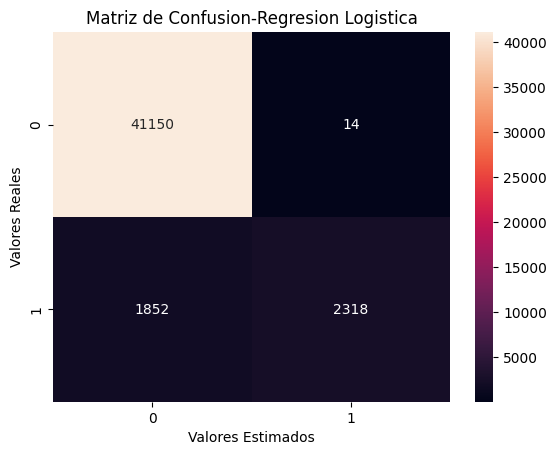

In [194]:
##Modelo supervisado

cm = confusion_matrix(y_test, logreg.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Valores Estimados')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusion-Regresion Logistica')

Text(0.5, 1.0, 'Matriz de Confusion-Isolation Forest')

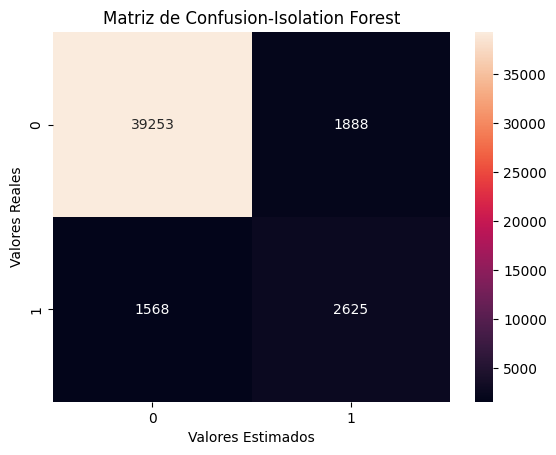

In [195]:
##Modelo No supervisado

cm = confusion_matrix(y_if_test, x_if_test[['resultado']])
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Valores Estimados')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusion-Isolation Forest')

In [196]:
##Modelo supervisado

print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41164
           1       0.99      0.56      0.71      4170

    accuracy                           0.96     45334
   macro avg       0.98      0.78      0.85     45334
weighted avg       0.96      0.96      0.95     45334



In [197]:
##Modelo no supervisado

print(classification_report(y_if_test, x_if_test[['resultado']]))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     41141
           1       0.58      0.63      0.60      4193

    accuracy                           0.92     45334
   macro avg       0.77      0.79      0.78     45334
weighted avg       0.93      0.92      0.93     45334



In [198]:
##Modelo supervisado

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))


In [199]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

In [200]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

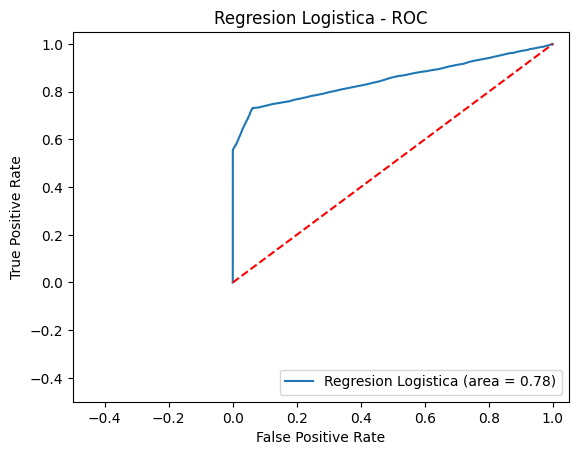

In [201]:
plt.plot(fpr, tpr, label ='Regresion Logistica (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.5, 1.05])
plt.ylim([-0.5, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Regresion Logistica - ROC')
plt.legend(loc='lower right')
plt.show()

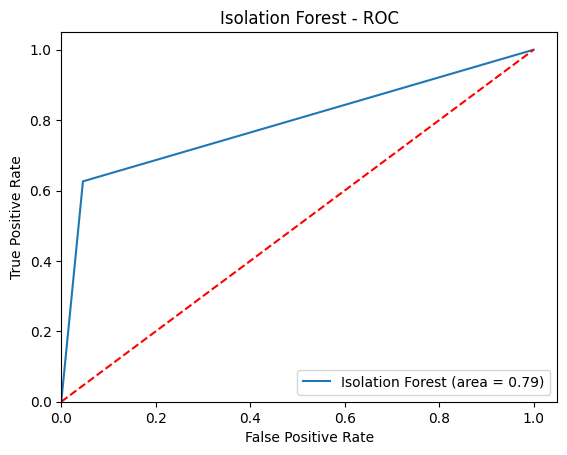

In [202]:
##Modelo No supervisado

logit_roc_auc = roc_auc_score(y_if_test, x_if_test[['resultado']])
fpr, tpr, thresholds = roc_curve(y_if_test, x_if_test[['resultado']])
plt.figure()
plt.plot(fpr, tpr, label ='Isolation Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Isolation Forest - ROC')
plt.legend(loc='lower right')
plt.show()